In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/train.csv


In [98]:
data=pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test=pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
import PIL
import matplotlib.pyplot as plt
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.layers import Dense,Conv2D,Dropout,BatchNormalization,AvgPool2D,Flatten
from keras.utils.np_utils import to_categorical

In [113]:
def show_img(index):
    value=data.loc[index][0]
    print("The number is : ",value)
    plt.imshow(np.asarray(data.loc[index][1:]).reshape(28,28),cmap="gray")

The number is :  3


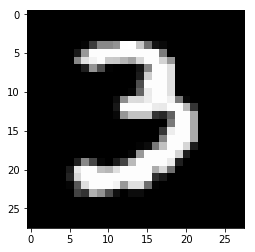

In [24]:
show_img(9)

In [121]:
Y_tra=data['label']
X_tra=data
X_tra=X_tra.drop(labels=['label'],axis=1)

In [122]:
Y_tra.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [123]:
Y_tra=to_categorical(Y_tra)

In [124]:
X_tra=X_tra/255
test=test/255

In [125]:
X_tra=X_tra.values.reshape((-1,28,28,1))
X_test=test.values.reshape((-1,28,28,1))

In [76]:
X_tr,X_va,Y_tr,Y_va=train_test_split(X_tra,Y_tra,test_size=0.2)

In [131]:
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=(4,4),padding='same',activation='relu'))
model.add(Conv2D(filters=16,kernel_size=(4,4),padding='same',activation='relu'))
model.add(AvgPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Conv2D(filters=32,kernel_size=(4,4),padding='same',activation='relu'))
model.add(Conv2D(filters=32,kernel_size=(4,4),padding='same',activation='relu'))
model.add(AvgPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Conv2D(filters=64,kernel_size=(4,4),padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(4,4),padding='same',activation='relu'))
model.add(AvgPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(10,activation="softmax"))

In [132]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [133]:
history=model.fit(X_tr,Y_tr,validation_data=(X_va,Y_va),epochs=10)

Train on 33600 samples, validate on 8400 samples
Epoch 1/10
33600/33600 [==============================] - 16s 464us/step - loss: 0.1503 - accuracy: 0.9538 - val_loss: 0.0725 - val_accuracy: 0.9771
Epoch 2/10
33600/33600 [==============================] - 14s 423us/step - loss: 0.0635 - accuracy: 0.9800 - val_loss: 0.0525 - val_accuracy: 0.9850
Epoch 3/10
33600/33600 [==============================] - 14s 406us/step - loss: 0.0461 - accuracy: 0.9861 - val_loss: 0.0586 - val_accuracy: 0.9824
Epoch 4/10
33600/33600 [==============================] - 14s 426us/step - loss: 0.0397 - accuracy: 0.9874 - val_loss: 0.0508 - val_accuracy: 0.9845
Epoch 5/10
33600/33600 [==============================] - 15s 435us/step - loss: 0.0339 - accuracy: 0.9895 - val_loss: 0.0424 - val_accuracy: 0.9881
Epoch 6/10
33600/33600 [==============================] - 14s 407us/step - loss: 0.0346 - accuracy: 0.9890 - val_loss: 0.0309 - val_accuracy: 0.9927
Epoch 7/10
33600/33600 [==============================] -

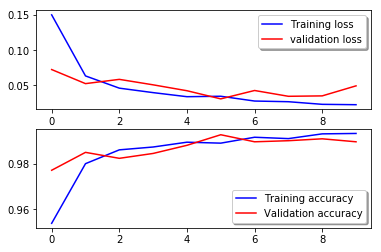

In [137]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)